# Задание 1

Вернемся к [набору данных о видеоиграх](https://github.com/obulygin/pyda_homeworks/blob/master/stat_case_study/vgsales.csv).

Ответьте на следующие вопросы:

1) Как критики относятся к спортивным играм?  
2) Критикам нравятся больше игры на PC или на PS4?  
3) Критикам больше нравятся стрелялки или стратегии?  

Для каждого вопроса:
- сформулируйте нулевую и альтернативную гипотезы;
- выберите пороговый уровень статистической значимости;
- опишите полученные результаты статистического теста.

In [1]:
import numpy as np  
import pandas as pd  # для работы с таблицами
from scipy import stats as st # для работы со статистикой
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов 
import seaborn as sns # Более продвинутая библиотека для визуализации
import glob
import pandas as pd
import re

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\myaut\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\myaut\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
df = pd.read_csv('vgsales.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


**1. Как критики относятся к спортивным играм?**

H0: Критики плохо относятся к спортивным играм. Средний рейтинг критиков < 50

H1: Критики хорошо относятся к спортивным играм. Средний рейтинг критиков >= 50

In [3]:
alpha = 0.05
#Сравниваем значение по выборке с константой, поэтому нужен одновыборочный критерий.
result = st.ttest_1samp(df[df['Genre'] == 'Sports']['Critic_Score'].dropna(), 50, alternative='greater')

print(df[df['Genre'] == 'Sports']['Critic_Score'].mean())
print('-' * 50)
print(result)
print('-' * 50)
if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу, среднее больше 50. Критики хорошо относятся к спортивным играм' )
else:
    print('Не отвергаем нулевую гипотезу. Критики плохо относятся к спортивным играм')

71.96817420435511
--------------------------------------------------
Ttest_1sampResult(statistic=54.696017932916575, pvalue=0.0)
--------------------------------------------------
Отвергаем нулевую гипотезу, среднее больше 50. Критики хорошо относятся к спортивным играм


**2. Критикам нравятся больше игры на PC или на PS4?**

Используем двухвыборочный двухсторонний критерий

In [4]:
A1 = df[df['Platform'] == 'PC']['Critic_Score']
A2 = df[df['Platform'] == 'PS4']['Critic_Score']

# выдвинем гипотезу
H0 = ' Выборки статистически не различаются.'
H1 =  'Выборки статистически различаются.'
A1_version = 'Критикам  нравятся больше игры на PC, чем на PS4.'
A2_version = 'Критикам  нравятся больше игры на PS4, чем на PC.'
result = st.ttest_ind(A1,A2, equal_var=False, nan_policy='omit')
print(A1.mean())
print(A2.mean())
print('-' * 50)
print(result)
print('-' * 50)
if (result.pvalue < alpha):
    print(H1)
    if result.statistic > 0:
        print(A1_version)
    else:
        print(A2_version)
else:
    print(H0)

75.92867132867133
72.09126984126983
--------------------------------------------------
Ttest_indResult(statistic=4.3087588262138725, pvalue=2.0672491572827482e-05)
--------------------------------------------------
Выборки статистически различаются.
Критикам  нравятся больше игры на PC, чем на PS4.


**3.Критикам больше нравятся стрелялки или стратегии?**

Используем двухвыборочный сторонний критерий

In [5]:
A1 = df[df['Genre'] == 'Shooter']['Critic_Score']
A2 = df[df['Genre'] == 'Strategy']['Critic_Score']

# выдвинем гипотезу
H0 = ' Выборки статистически не различаются.'
H1 =  'Выборки статистически различаются.'
A1_version = 'Критикам больше нравятся стрелялки, чем стратегии'
A2_version = 'Критикам больше нравятся стратегии, чем стрелялки.'
result = st.ttest_ind(A1,A2, equal_var=False, nan_policy='omit')
print(A1.mean())
print(A2.mean())
print('-' * 50)
print(result)
print('-' * 50)
if (result.pvalue < alpha):
    print(H1)
    if result.statistic > 0:
        print(A1_version)
    else:
        print(A2_version)
else:
    print(H0)

70.18114406779661
72.08609271523179
--------------------------------------------------
Ttest_indResult(statistic=-2.2972408230640315, pvalue=0.021938989522305212)
--------------------------------------------------
Выборки статистически различаются.
Критикам больше нравятся стратегии, чем стрелялки.


# Задание 2

Реализуйте базовую модель логистической регрессии для классификации текстовых сообщений (используемые данные [здесь](https://github.com/obulygin/pyda_homeworks/blob/master/stat_case_study/spam.csv)) по признаку спама. Для этого:

1) Привидите весь текст к нижнему регистру;  
2) Удалите мусорные символы;  
3) Удалите стоп-слова;  
4) Привидите все слова к нормальной форме;  
5) Преобразуйте все сообщения в вектора TF-IDF. Вам поможет следующий код:  

```
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df.Message)
names = tfidf.get_feature_names()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)
```

Можете поэкспериментировать с параметрами [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html);  
6) Разделите данные на тестовые и тренировочные в соотношении 30/70, укажите `random_state=42`. Используйте [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html);  
7) Постройте модель [логистической регрессии](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), укажите `random_state=42`, оцените ее точность на тестовых данных;  
8) Опишите результаты при помощи [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html?highlight=confusion_matrix#sklearn.metrics.confusion_matrix);  
9) Постройте датафрейм, который будет содержать все исходные тексты сообщений, классифицированные неправильно (с указанием фактического и предсказанного).

In [6]:
data = pd.read_csv('spam.csv')
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
#1.Привидите весь текст к нижнему регистру
data['Message_clear'] = data['Message'].str.lower()
data.head()

,Category,Message,Message_clear
0,ham,"Go until jurong point, crazy.. Available only ...","go until jurong point, crazy.. available only ..."
1,ham,Ok lar... Joking wif u oni...,ok lar... joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor... u c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro...","nah i don't think he goes to usf, he lives aro..."


In [8]:
#2.Удалите мусорные символы
data['Message_clear'].replace('[\W_]+',' ',regex=True, inplace = True)
data.head()

,Category,Message,Message_clear
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don t think he goes to usf he lives arou...


In [9]:
stopwords_set = set(stopwords.words('english'))

In [10]:
#Запустим цикл, где уберем из текста все стоп-слова
#проходимся по всем строчкам датафрейма, разделяем содержимое строки на слова, записываем список в переменную words
for index, row in data.iterrows():
    words = row['Message_clear'].split(' ')
    # перебираем все слова из списка words и ищем их вхождение в список стоп-слов stopwords_set. 
    # если совпадение есть, удаляем из переменной words это слово
    for word in words:
        if word in stopwords_set:
            words.remove(word)   
    #записываем в датафрейм очищенный текст
    row['Message_clear'] = words

In [11]:
data.head()

,Category,Message,Message_clear
0,ham,"Go until jurong point, crazy.. Available only ...","[go, jurong, point, crazy, available, in, bugi..."
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni, ]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,"[u, dun, say, early, hor, u, c, already, say, ]"
4,ham,"Nah I don't think he goes to usf, he lives aro...","[nah, don, think, goes, usf, lives, around, th..."


In [12]:
#4 Привидите все слова к нормальной форме;
#произведем лемматизацию

#Лемматизация — процесс приведения словоформы к лемме — её нормальной (словарной) форме. 
#В русском языке:
#- для существительных — именительный падеж, единственное число;
#- для прилагательных — именительный падеж, единственное число, мужской род;
#- для глаголов, причастий, деепричастий — глагол в инфинитиве несовершенного вида.
#
#В других языках – по аналогии.

lemmatizer= WordNetLemmatizer()

for index, row in data.iterrows():
    words_list = row['Message_clear']
    
    for i in range(len(words_list)):
        words_list[i] = lemmatizer.lemmatize(words_list[i]) 
        #преобразуем список в строку и записываем его в датафрейм очищенную строчку
    str1 = ' '.join(words_list)
    row['Message_clear'] = str1

data.head()

,Category,Message,Message_clear
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available in bugis n gre...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah don think go usf life around though


In [13]:
#5) Преобразуйте все сообщения в вектора TF-IDF.

#При построении словаря игнорируйте термины, частота которых в документе строго 15 (min_df = 15).
#Подбирается экспериментальным путем. Ориентируемся на максимальный коэф-т детерминации

tfidf = TfidfVectorizer(min_df = 15)
tfidf_matrix = tfidf.fit_transform(data.Message_clear)
names = tfidf.get_feature_names()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)

tfidf_matrix.head()

,000,08000839402,08000930705,10,100,1000,10p,11,12hrs,150,...,yeah,year,yes,yesterday,yet,yo,you,your,yr,yup
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
#6)Разделяем данные на тестовые и тренировочные в соотношении 30/70, 
#указывем random_state=42. Используем train_test_split

# в X записываем саму матрицу, а в у (то, что мы должны будем по итогу  правильно предсказывать) -  тип сообщения ham или spam 
#из датафрейма df, столбец 'Category'

X = tfidf_matrix
y = data['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [15]:
#Построим модель логистической регрессии, оцениваем ее точность на тестовых данных

model = LogisticRegression()
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

model.intercept_

array([-2.90812655])

In [16]:
# Вычисляем категориальные значения y_pred, используя тестовые данные X_test
y_pred = model.predict(X_test)
print(y_pred)
print(model.score(X_test, y_test)) # метод возвращает значение коэффициента детерминации

['ham' 'ham' 'ham' ... 'ham' 'spam' 'ham']
0.9772727272727273


In [17]:
#8) Опишите результаты при помощи confusion_matrix

confusion_matrix(y_test, y_pred)

array([[1443,    5],
       [  33,  191]], dtype=int64)

**Итого: из 1672 значений**
1443 правильных результата

5 ложноотрицательных результата

33 ложно положительных срабатываний

191 истинно отрицательных результатов

<AxesSubplot:>

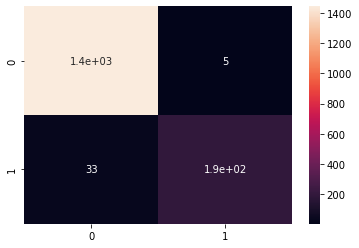

In [18]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [19]:
#9) Постройте датафрейм, который будет содержать все исходные тексты сообщений, классифицированные 
# неправильно (с указанием фактического и предсказанного).

# Отфильтруем исходный датафрейм df, оставим в нем только данные, которые попали в выборку X_test
ind_list = list(X_test.index.values)
df_X_test= pd.DataFrame(data=data, index=ind_list)
#создадим датафрейм с предсказанными значениями y_pred
df_y_pred= pd.DataFrame(data=y_pred, index=ind_list, columns =['Category_pred'])
#объединим этих два датафрейма
df_diff = pd.concat([df_X_test, df_y_pred], axis=1)
df_diff.head()

,Category,Message,Message_clear,Category_pred
3245,ham,Squeeeeeze!! This is christmas hug.. If u lik ...,squeeeeeze is christmas hug u lik frndshp den ...,ham
944,ham,And also I've sorta blown him off a couple tim...,also ve sorta blown off couple time recently i...,ham
1044,ham,Mmm thats better now i got a roast down me! i...,mmm thats better got roast me i d b better i a...,ham
2484,ham,Mm have some kanji dont eat anything heavy ok,mm some kanji dont eat anything heavy ok,ham
812,ham,So there's a ring that comes with the guys cos...,a ring come the guy costume s there so can gif...,ham


In [20]:
#оставим только строчки, в которых фактическая категория (Category) не равна предсказанной категории (Category_pred)
df_diff.loc[df_diff['Category'] != df_diff['Category_pred']]

,Category,Message,Message_clear,Category_pred
881,spam,Reminder: You have not downloaded the content ...,reminder have downloaded content have already ...,ham
3864,spam,Oh my god! I've found your number again! I'm s...,oh god ve found number i so glad text back xaf...,ham
2575,spam,Your next amazing xxx PICSFREE1 video will be ...,next amazing xxx picsfree1 video be sent you e...,ham
3548,spam,Rock yr chik. Get 100's of filthy films &XXX p...,rock yr chik get 100 of filthy film xxx pic yr...,ham
2402,spam,Babe: U want me dont u baby! Im nasty and have...,babe u want dont u baby im nasty have thing 4 ...,ham
2663,spam,Hello darling how are you today? I would love ...,hello darling are today would love have chat d...,ham
751,spam,"Do you realize that in about 40 years, we'll h...",you realize in 40 year ll thousand old lady ru...,ham
2364,spam,Fantasy Football is back on your TV. Go to Sky...,fantasy football back your tv go sky gamestar ...,ham
3463,spam,Bloomberg -Message center +447797706009 Why wa...,bloomberg message center 447797706009 wait app...,ham
227,spam,Will u meet ur dream partner soon? Is ur caree...,u meet ur dream partner soon ur career 2 flyng...,ham
